In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
a=pd.read_csv("BIKE DETAILS.csv")
a.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Understand the Columns
The dataset includes:

name: Bike model

selling_price: Price at which the bike was sold

year: Year of manufacture

seller_type: Type of seller (mostly "Individual")

owner: Ownership status (e.g., "1st owner")

km_driven: Kilometers driven

ex_showroom_price: Original showroom price (some missing)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
a.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
len(a)

1061

ex_showroom_price = 435 null values

null percentage = (null value / len(a))*100

null percentage = (435/1061)*100

null percentage = 40.99%

null percentage is 40 so i drop it

In [ ]:
# Drop rows
a = a.dropna(subset=['ex_showroom_price'])

In [ ]:
a.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [ ]:
a.describe()

,selling_price,year,km_driven,ex_showroom_price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


1. Drop Outliers in km_driven

Some bikes show over 600,000 km, which is highly unrealistic.

These are likely data entry errors or rare cases that distort analysis.



In [ ]:
# Calculate IQR bounds
Q1 = a["km_driven"].quantile(0.25)
print("Q1:",Q1)
Q3 = a["km_driven"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
LB = Q1 - 1.5 * IQR
print("LB:",LB)
UB = Q3 + 1.5 * IQR
print("UB:",UB)
# Identify outliers
outliers_km = a[(a["km_driven"] < LB) | (a["km_driven"] > UB)]
# View how many outliers
print("Outliers in km_driven:", len(outliers_km))

Q1: 13031.25
Q3: 40000.0
IQR: 26968.75
LB: -27421.875
UB: 80453.125
Outliers in km_driven: 23


In [ ]:
a.drop(index=outliers_km.index,inplace=True) # here we drop the ouliters

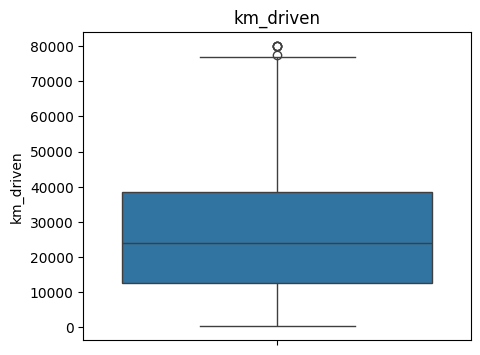

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(a["km_driven"])
plt.title("km_driven")
plt.show()

2. Drop Outliers in selling_price

Keep prices between ₹5,000 and ₹10,00,000.

This removes junk entries and luxury bikes that skew averages.

In [ ]:
Q1 = a['selling_price'].quantile(0.25)
Q3 = a['selling_price'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# Identify outliers
outliers_price = a[(a['selling_price'] < LB) | (a['selling_price'] > UB)]
print("Outliers in selling_price:", len(outliers_price))

Outliers in selling_price: 58


In [ ]:
a.drop(index=outliers_price.index,inplace=True) # here we drop the ouliters

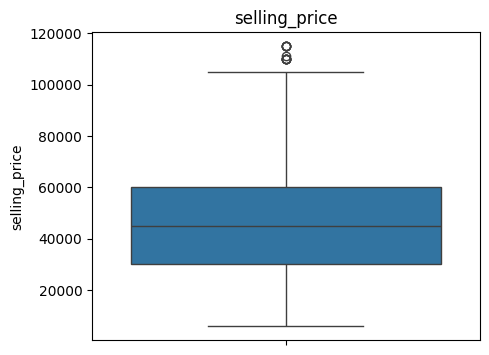

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(a['selling_price'])
plt.title("selling_price")
plt.show()

In [ ]:
a.duplicated().sum()

np.int64(3)

In [ ]:
a = a.drop_duplicates().reset_index(drop=True)
a.duplicated().sum()

np.int64(0)

In [ ]:
#1.Which bike models have the highest average selling price?
b=a.groupby('name')['selling_price'].mean().sort_index()
b.head(6)

,selling_price
name,
Activa 3g,45000.0
Activa 4g,40000.0
Bajaj ct 100,18000.0
Bajaj Avenger 150,75000.0
Bajaj Avenger 150 street,60000.0
Bajaj Avenger 220,79000.0


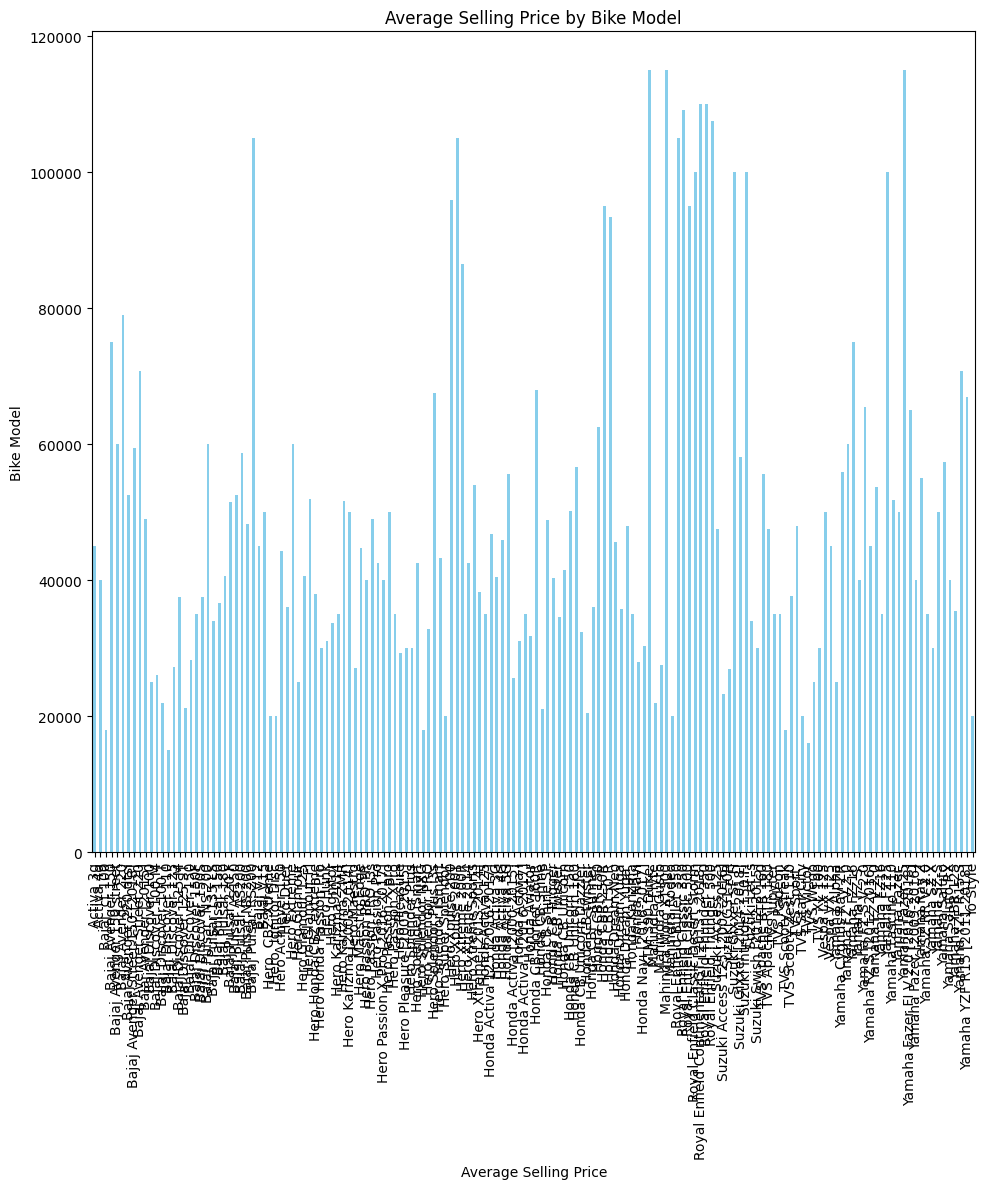

In [ ]:
b.plot(kind='bar', figsize=(10, 12), color='skyblue')
plt.xlabel("Average Selling Price")
plt.ylabel("Bike Model")
plt.title("Average Selling Price by Bike Model")
plt.tight_layout()
plt.show()

A few bike models have significantly higher average selling prices, crossing ₹100,000.

These are likely premium or performance bikes (e.g., Royal Enfield, KTM, Yamaha R15), indicating strong resale value and brand loyalty.

Budget bikes under ₹25,000 still attract buyers, reflecting strong demand in utility and rural segments.

In [ ]:
#2.Which years have the most bikes listed?
c=a['year'].value_counts().sort_index()
c.head()


,count
year,
2001,1
2004,1
2005,1
2006,4
2007,6


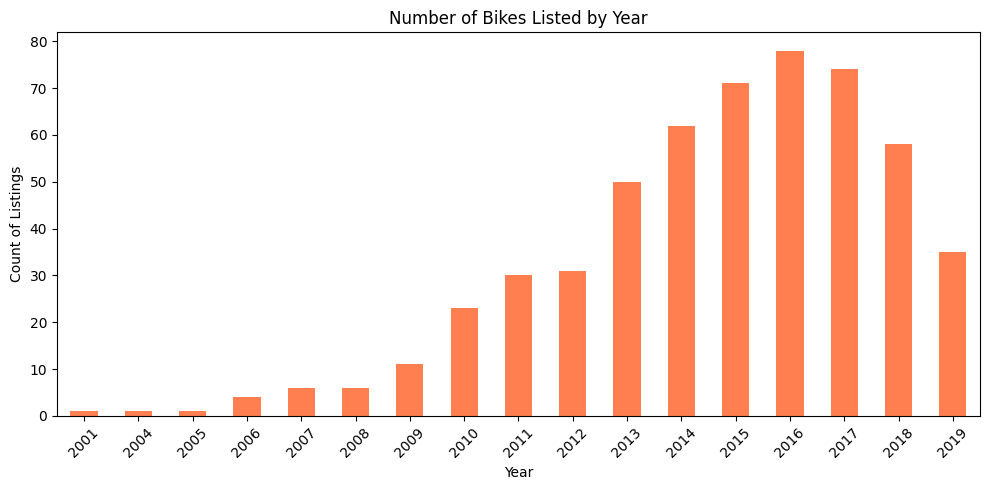

In [ ]:
c.plot(kind='bar', figsize=(10, 5), color='coral')
plt.title("Number of Bikes Listed by Year")
plt.xlabel("Year")
plt.ylabel("Count of Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bike listings steadily increased from 2001, peaking in 2016 with the highest volume.

Post-2016 shows a slight decline, possibly due to market saturation or shifting consumer trends.

The upward trend from 2010 onward reflects growing interest in the second-hand bike market

In [ ]:
#3.Which owner types fetch the highest resale price?
d=a.groupby('owner')['selling_price'].mean().sort_values()
d

,selling_price
owner,
2nd owner,36166.649123
3rd owner,39333.333333
1st owner,48046.856846


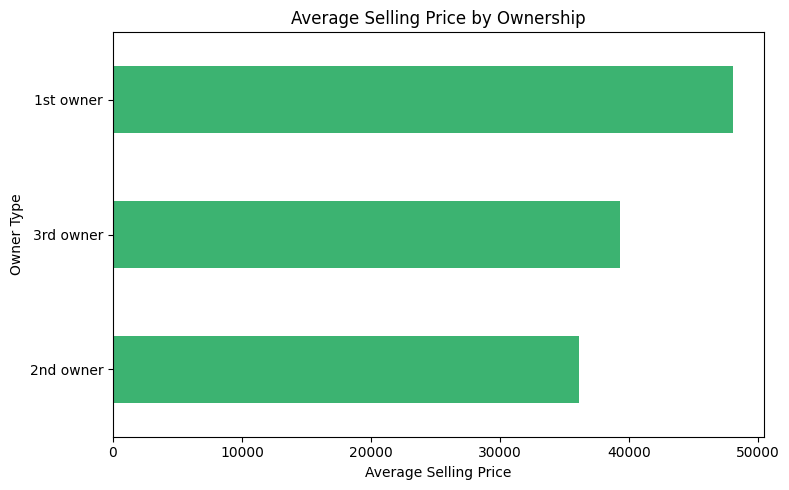

In [ ]:
d.plot(kind='barh', color='mediumseagreen', figsize=(8, 5))
plt.xlabel("Average Selling Price")
plt.ylabel("Owner Type")
plt.title("Average Selling Price by Ownership")
plt.tight_layout()
plt.show()


1st owner bikes fetch the highest resale value, averaging close to ₹50,000.

2nd and 3rd owner bikes show noticeably lower prices, reflecting reduced buyer trust and condition.

Ownership history clearly impacts resale value, making first-owner listings more attractive in the market.

In [ ]:
#4.Average kilometers driven per model?
e=a.groupby('name')['km_driven'].mean().sort_values().head(10)
e

,km_driven
name,
Activa 3g,500.000000
Activa 4g,1300.000000
Bajaj Avenger 220,1766.666667
Hero Splendor Plus i3s,2000.000000
Hero Xpulse 200T,2900.000000
Hero Passion Pro,3850.000000
Yamaha Cygnus Ray ZR,3900.000000
Vespa LX 125,3909.000000
Suzuki Access 125,4450.000000


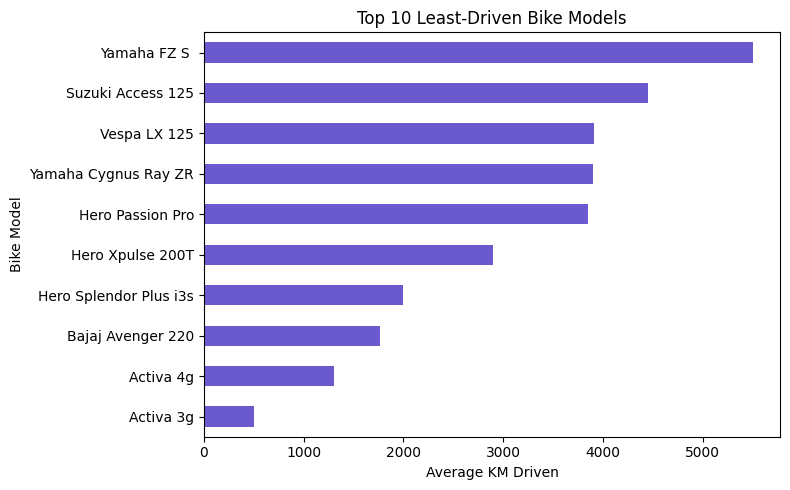

In [ ]:
e.plot(kind='barh', color='slateblue', figsize=(8, 5))
plt.xlabel("Average KM Driven")
plt.ylabel("Bike Model")
plt.title("Top 10 Least-Driven Bike Models")
plt.tight_layout()
plt.show()

Scooters like Activa 3G, Vespa LX 125, and Suzuki Access 125 show the lowest average kilometers, suggesting light urban usage.

Premium or niche models such as Yamaha FZ S and Hero Xpulse 200T also appear with low mileage, indicating selective or recreational use.

Low average kilometers driven may reflect better condition and higher resale appeal for these models in the second-hand market.

In [ ]:
#5.Which models are most frequently listed?
f=a['name'].value_counts().head(10)
f

,count
name,
Bajaj Pulsar 180,20
Honda CB Hornet 160R,19
Honda Activa [2000-2015],18
Bajaj Discover 125,16
Yamaha FZ S V 2.0,16
Honda Activa 3G,15
Honda CB Unicorn 150,14
Honda Activa 5G,12
Bajaj Pulsar 135 LS,12


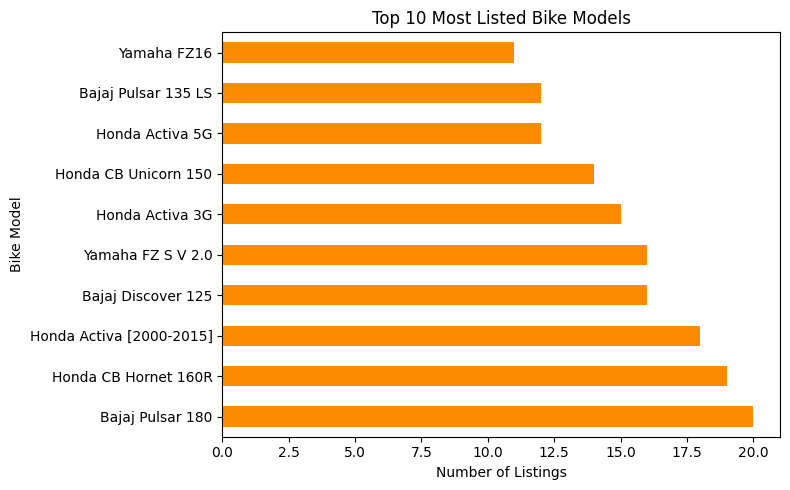

In [ ]:
f.plot(kind='barh', color='darkorange', figsize=(8, 5))
plt.xlabel("Number of Listings")
plt.ylabel("Bike Model")
plt.title("Top 10 Most Listed Bike Models")
plt.tight_layout()
plt.show()


Bajaj Pulsar 180 leads in listings, reflecting strong market presence and resale activity.

Honda Activa variants appear multiple times, confirming their dominance in the urban scooter segment.

Frequent listings of models like Yamaha FZ16 and CB Unicorn 150 suggest high circulation and consistent demand.

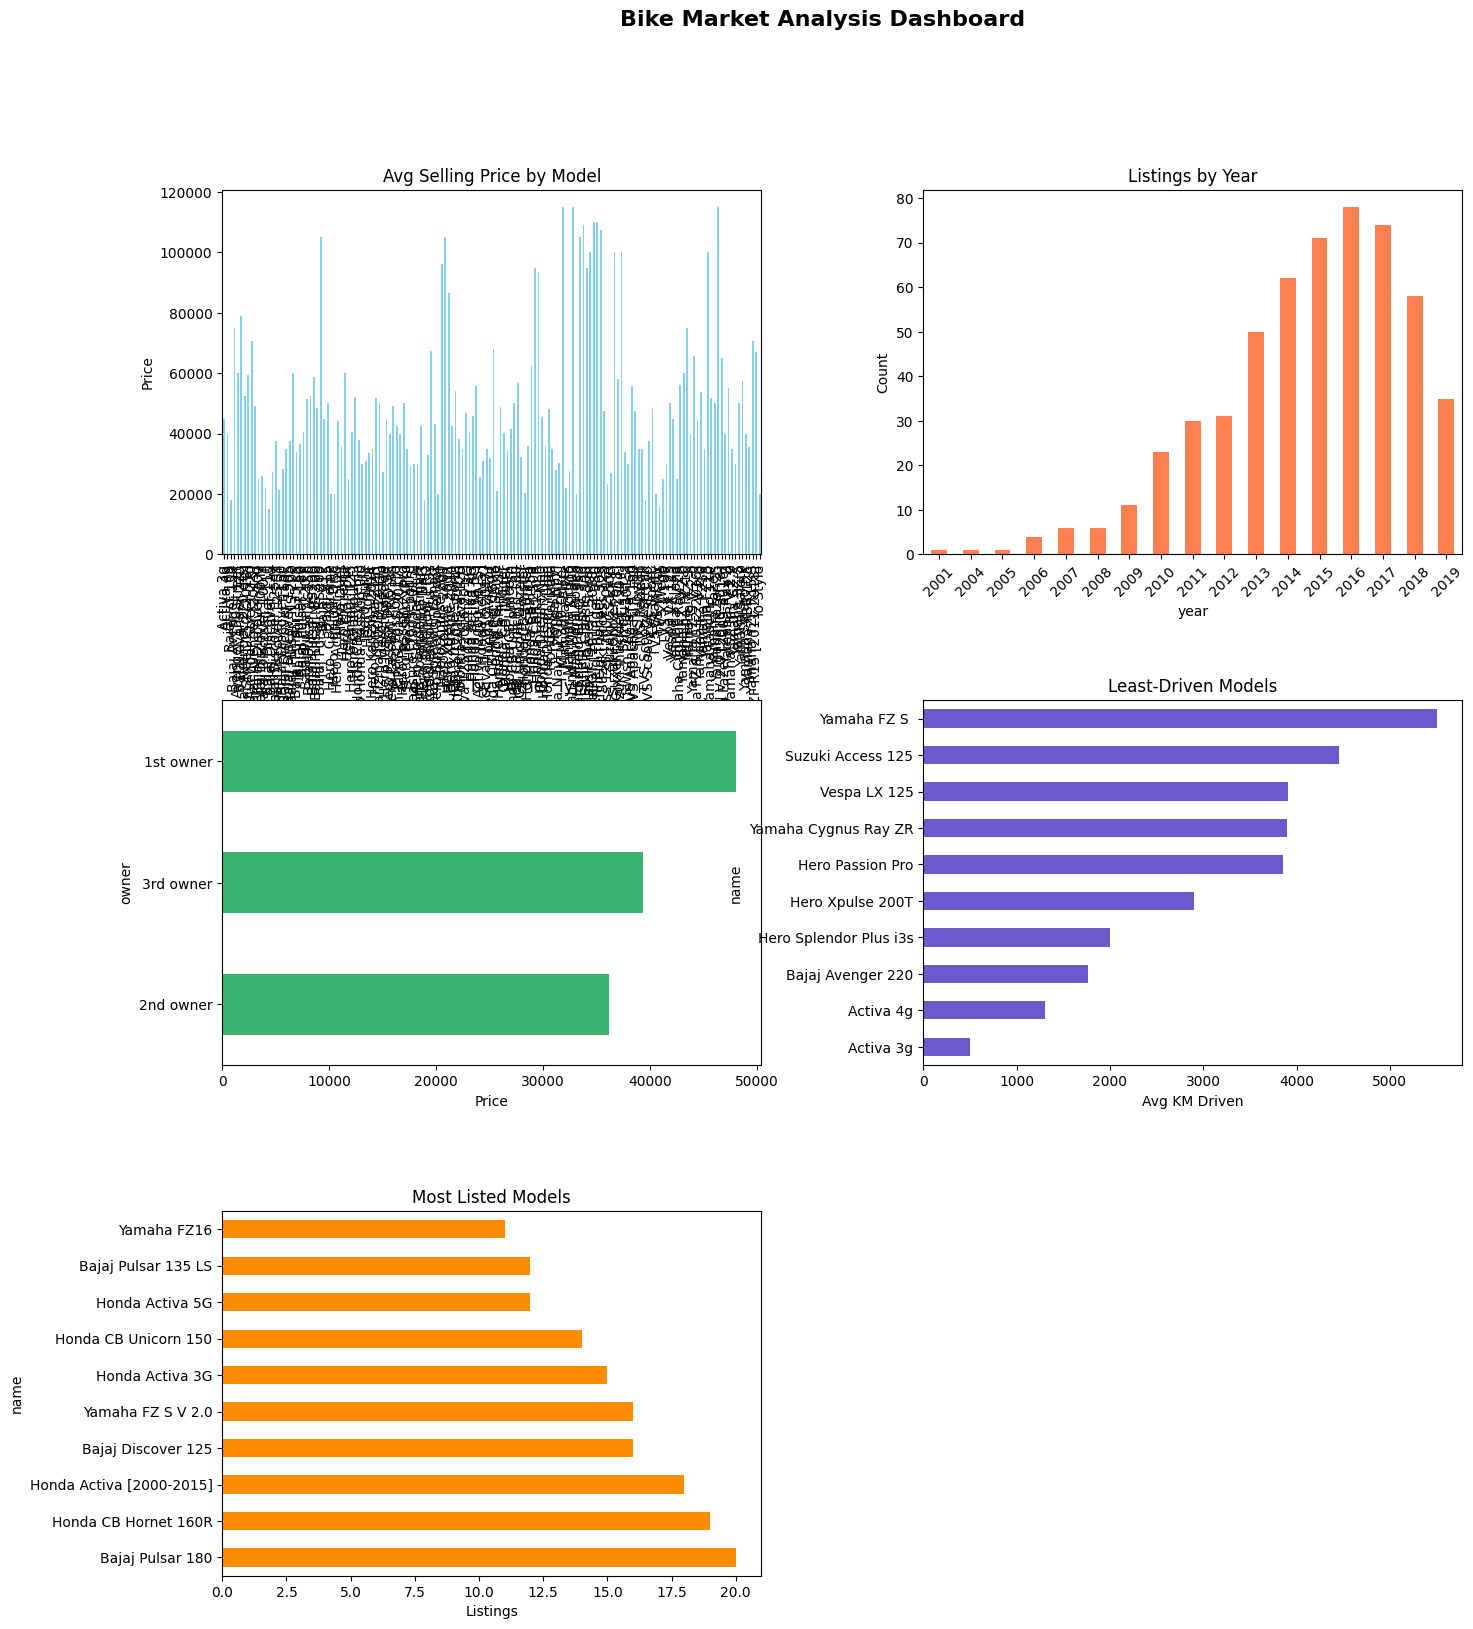

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
# 1. Average Selling Price by Bike Model
b.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Avg Selling Price by Model")
axs[0, 0].set_ylabel("Price")
axs[0, 0].tick_params(axis='x', labelrotation=90)
# 2. Number of Bikes Listed by Year
c.plot(kind='bar', ax=axs[0, 1], color='coral')
axs[0, 1].set_title("Listings by Year")
axs[0, 1].set_ylabel("Count")
axs[0, 1].tick_params(axis='x', labelrotation=45)
# 3. Avg Selling Price by Ownership
d.plot(kind='barh', ax=axs[1, 0], color='mediumseagreen')
axs[1, 0].set_title("Avg Price by Owner Type")
axs[1, 0].set_xlabel("Price")
# 4. Least-Driven Bike Models
e.plot(kind='barh', ax=axs[1, 1], color='slateblue')
axs[1, 1].set_title("Least-Driven Models")
axs[1, 1].set_xlabel("Avg KM Driven")
# 5. Most Listed Bike Models
f.plot(kind='barh', ax=axs[2, 0], color='darkorange')
axs[2, 0].set_title("Most Listed Models")
axs[2, 0].set_xlabel("Listings")
# 6. Placeholder for future plot or leave blank
axs[2, 1].axis('off')  # You can add another plot here later
plt.suptitle("Bike Market Analysis Dashboard", fontsize=16, fontweight='bold')
plt.show()
